In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [59]:
balance = 1059.48

In [60]:
income = 5000

In [61]:
usdils = 3.5

expenses = {
    'Lease': ['Fixed', 1800+450, '5th', 'Car'],
    'Insurance': ['Fixed', 640+112, '15th', 'Car'],
    'Fuel': ['Variable', 300, 'flexible', 'Car'],
    'Carwash': ['Variable', 50*2, 'flexible', 'Car'],
    'Savings': ['Fixed', 150*usdils, '5th', 'Savings'],
    'Books': ['Variable', 0, 'flexible', 'Self Development'],
    'Going Out': ['Variable', 0, 'flexible', 'Entertainment'],
    'Netflix': ['Fixed', 32, '15th', 'Entertainment'],
    'YT': ['Fixed', 20, '15th', 'Necessities'],
    'Waking Up': ['Fixed', 50, '15th', 'Health'],
    'GSuite': ['Fixed', 5*usdils, '15th', 'Business'],
    'Audible': ['Fixed', 15*usdils, '15th', 'Self Development'],
    'Phone': ['Fixed', 76, '15th', 'Necessities'],
    'Loans': ['Fixed', 160, '15th', 'Loans'],
    'Donate': ['Variable', income*0.10, 'flexible', 'Donations'],
    'Pointer': ['Fixed', 58, '15th', 'Car'],
}

expenses

{'Lease': ['Fixed', 2250, '5th', 'Car'],
 'Insurance': ['Fixed', 752, '15th', 'Car'],
 'Fuel': ['Variable', 300, 'flexible', 'Car'],
 'Carwash': ['Variable', 100, 'flexible', 'Car'],
 'Savings': ['Fixed', 525.0, '5th', 'Savings'],
 'Books': ['Variable', 0, 'flexible', 'Self Development'],
 'Going Out': ['Variable', 0, 'flexible', 'Entertainment'],
 'Netflix': ['Fixed', 32, '15th', 'Entertainment'],
 'YT': ['Fixed', 20, '15th', 'Necessities'],
 'Waking Up': ['Fixed', 50, '15th', 'Health'],
 'GSuite': ['Fixed', 17.5, '15th', 'Business'],
 'Audible': ['Fixed', 52.5, '15th', 'Self Development'],
 'Phone': ['Fixed', 76, '15th', 'Necessities'],
 'Loans': ['Fixed', 160, '15th', 'Loans'],
 'Donate': ['Variable', 500.0, 'flexible', 'Donations'],
 'Pointer': ['Fixed', 58, '15th', 'Car']}

In [62]:
savings_usd = 150

balance_sheet = {
    'Name': ['Bank', 'Savings'],
    'Type': ['Debt', 'Assets'],
    'Amount': [9943, savings_usd*usdils]
}

# Excluding the car debt which I'm considering more of a monthly cash expense, but it is paid using a loan though ...

balance = pd.DataFrame(balance_sheet)

balance

,Name,Type,Amount
0,Bank,Debt,9943.0
1,Savings,Assets,525.0


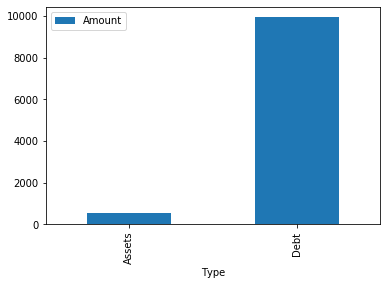

In [63]:
balance.groupby(by=['Type']).sum().plot.bar()
plt.show()

In [64]:
df = pd.DataFrame(expenses, index=['Type', 'Amount', 'Due', 'Category']).transpose()
df.sort_values(by=['Amount'], ascending=False, inplace=True)
df

df.to_csv('mySpending.csv')

In [65]:
expenses = df.agg({'Amount': 'sum'})
expenses

Amount    4893.0
dtype: float64

In [66]:
room_pct = 0.25

room = df['Amount'].sum() * room_pct

roomns': ['Fi

SyntaxError: invalid syntax (<ipython-input-66-2a1ae9d16136>, line 5)

In [67]:
expenses + room

Amount    6016.25
dtype: float64

In [68]:
c = df.groupby(['Category']).sum()[['Amount']].sort_values(by=['Amount'], ascending=False)

c

,Amount
Category,
Car,3460.0
Savings,525.0
Donations,500.0
Loans,160.0
Necessities,96.0
Self Development,52.5
Health,50.0
Entertainment,32.0
Business,17.5


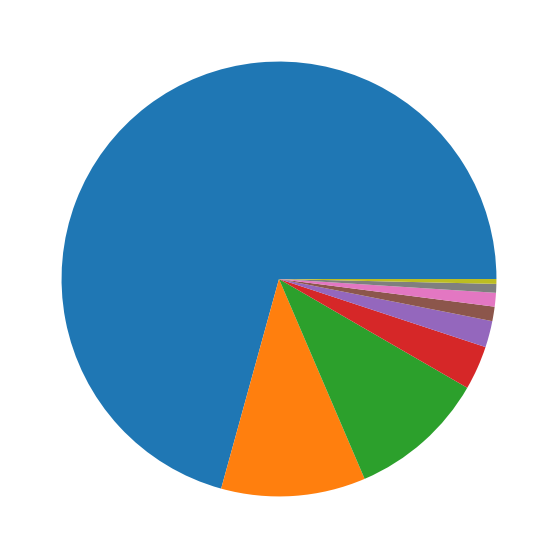

In [69]:
plt.figure(figsize=(10,10))
plt.pie(c)
plt.show()

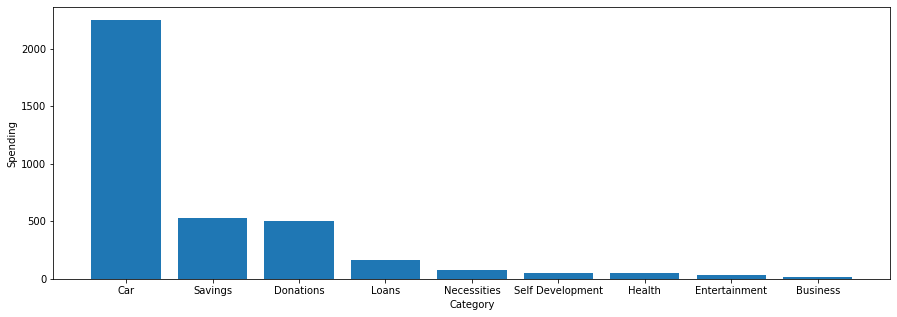

In [70]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,5))

x = df['Category']
y = df['Amount']

plt.bar(x, y)
plt.xlabel('Category')
plt.ylabel('Spending')
plt.show()

In [71]:
t = df.groupby(['Type']).sum()[['Amount']].sort_values(by=['Amount'], ascending=False)

t

,Amount
Type,
Fixed,3993.0
Variable,900.0
